c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


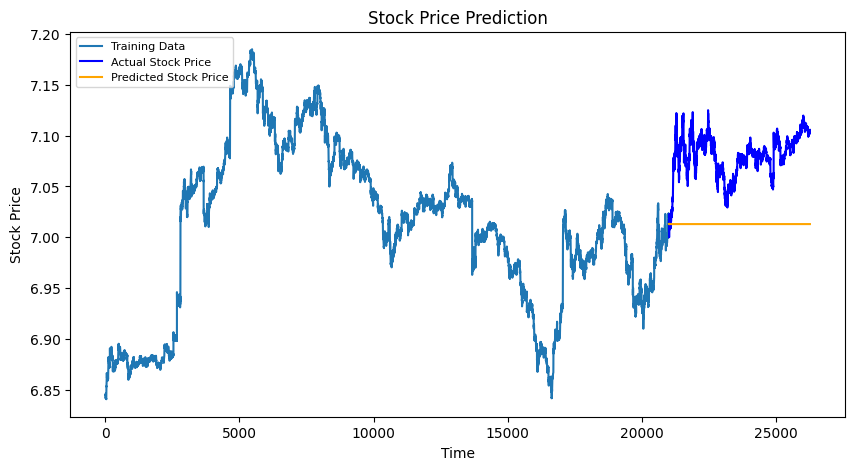

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'data.csv' with your actual dataset file)
df = pd.read_csv('data.csv')

# Assuming 'close' price column is used for ARIMA
data = df['close'].values

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# ARIMA model parameters
p, d, q = 5, 1, 5
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecast the length of the test data
fc = model_fit.forecast(len(test), alpha=0.05)

# Convert forecast results to a pandas Series
fc_series = pd.Series(fc, index=np.arange(train_size, train_size + len(test)))


# Plot
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train, label='Training Data')
plt.plot(np.arange(train_size, train_size + len(test)), test, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()